<a href="https://colab.research.google.com/github/Leandro-Braga/Leandro-Braga/blob/main/estudo_ipca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns

In [46]:
df = pd.read_excel('sample_data/ipca.xlsx')

df.head()

,Month,Value
0,2000-01-01,49.5
1,2000-02-01,50.1
2,2000-03-01,50.3
3,2000-04-01,50.3
4,2000-05-01,50.7


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   240 non-null    datetime64[ns]
 1   Value   240 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


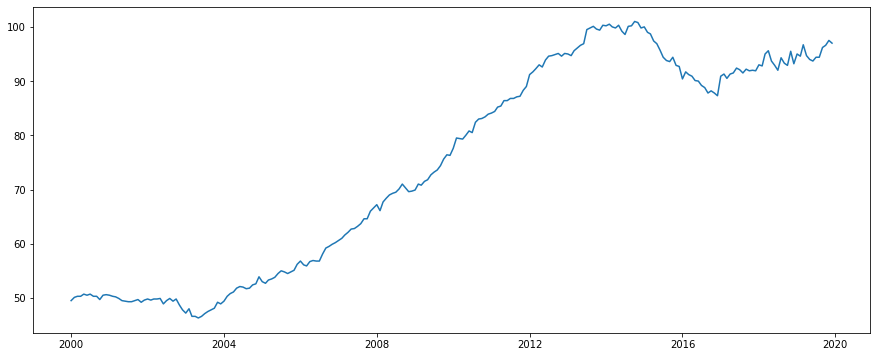

In [48]:
plt.plot(df.Month, df.Value)

In [49]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
df.Month = pd.to_datetime(df.Month)
df.set_index('Month', inplace=True)

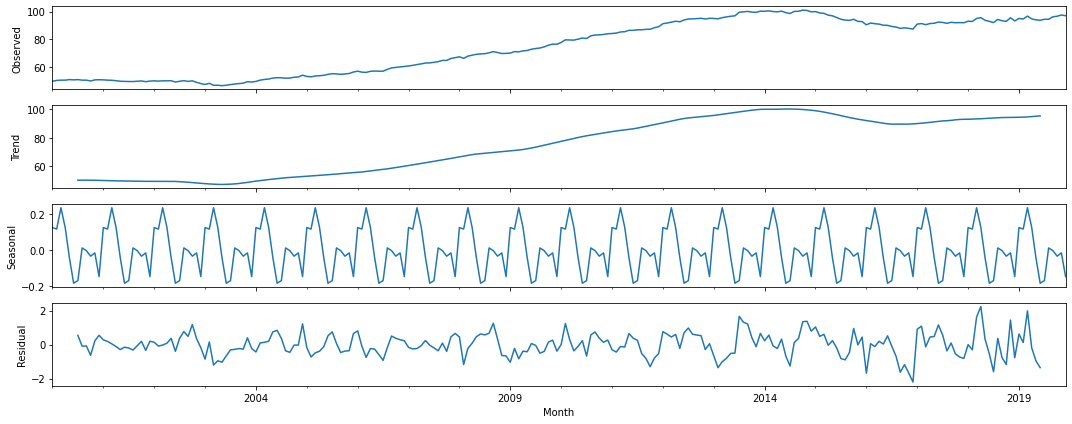

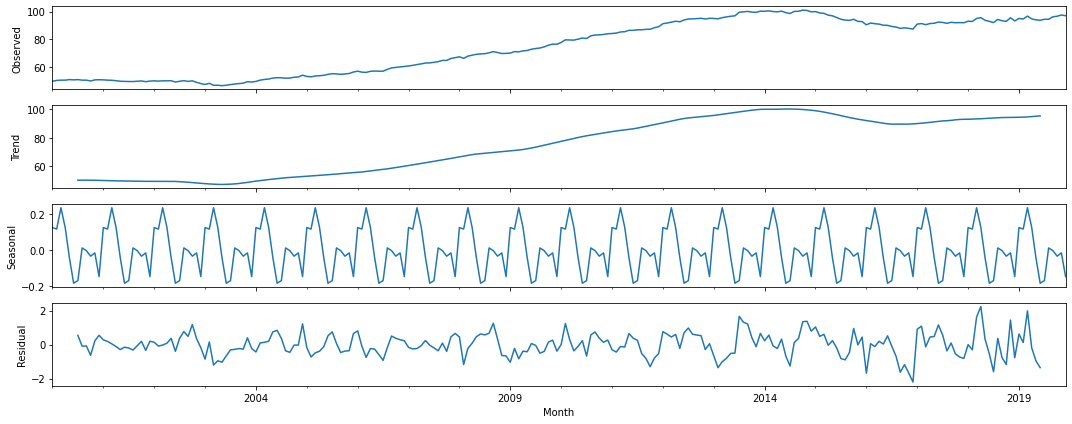

In [50]:
result = seasonal_decompose(df, model='additive')
result.plot()

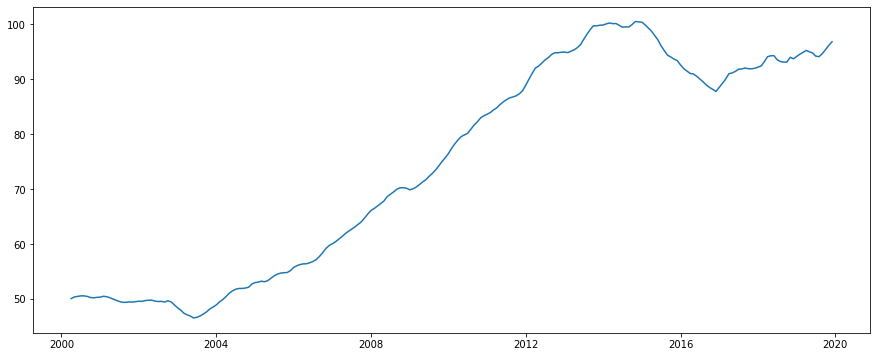

In [51]:
Dados = df
mm = pd.DataFrame.rolling(Dados,window=4,center=False).mean()
plt.plot(mm)

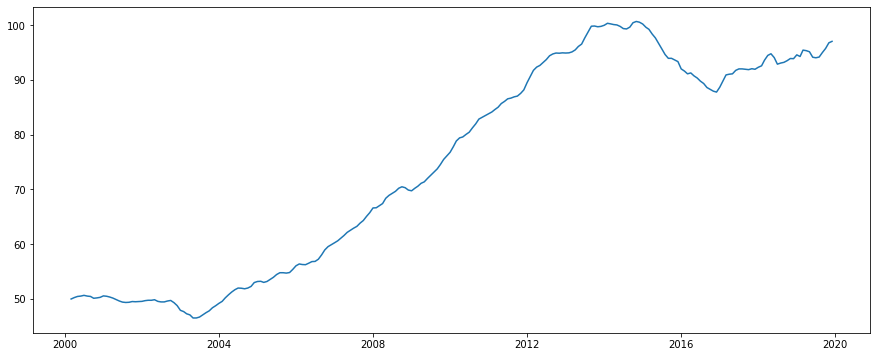

In [52]:
mm = pd.DataFrame.rolling(Dados,window=3,center=False).mean()
plt.plot(mm)

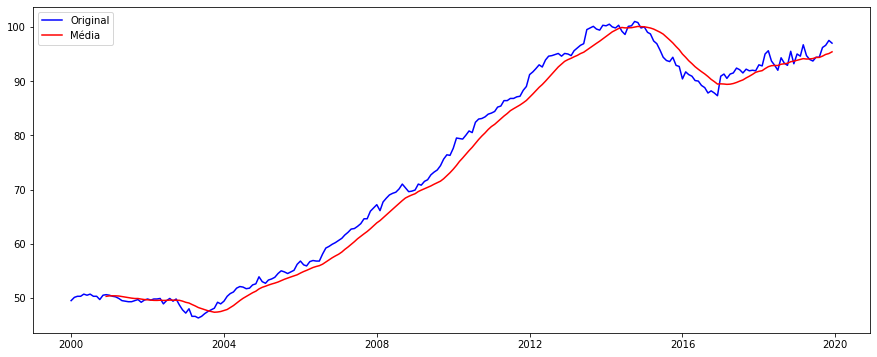

In [53]:
# Modelo de Médias Móveis comparado à série com k=12
mm = pd.DataFrame.rolling(Dados,window=12,center=False).mean()
orig = plt.plot(Dados, color='blue',label='Original')
mean = plt.plot(mm, color='red',label='Média')
plt.legend(loc='best')
plt.show()

In [54]:
def moving_average(series, n):
  return np.average(series[-n:])

moving_average(Dados, 2)

97.25

In [55]:
moving_average(Dados, 12)

95.40000000000002

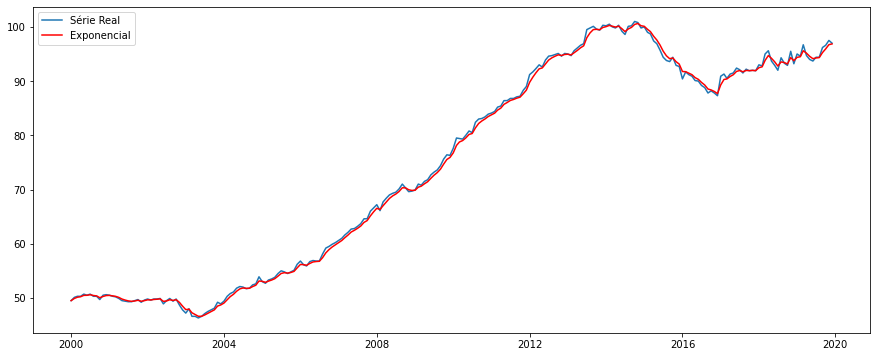

In [56]:
# Amortecimento Exponencial alfa = 0,5)
rolling =  Dados.ewm(alpha=0.5)
rolling_mean = rolling.mean()
plt.plot(Dados, label='Série Real')
plt.plot(rolling_mean,color='red', label='Exponencial')
plt.legend(loc='best')
plt.show()

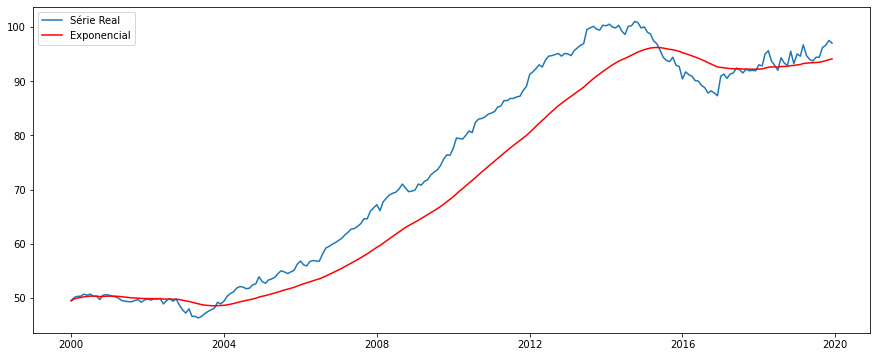

In [57]:
# Amortecimento Exponencial alfa = 0,05)
rolling =  Dados.ewm(alpha =0.05)
rolling_mean = rolling.mean()
plt.plot(Dados, label='Série Real')
plt.plot(rolling_mean,color='red', label='Exponencial')
plt.legend(loc='best')
plt.show()

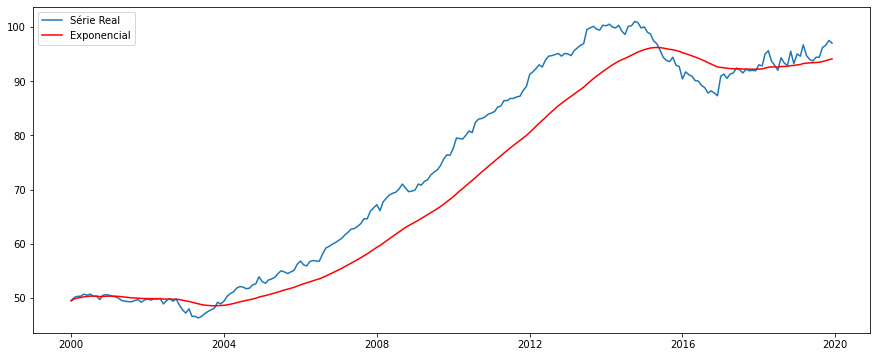

In [63]:
# Amortecimento Exponencial alfa = 0,05)
rolling =  Dados.ewm(alpha =0.05)
rolling_mean = rolling.mean()
plt.plot(Dados, label='Série Real')
plt.plot(rolling_mean,color='red', label='Exponencial')
plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


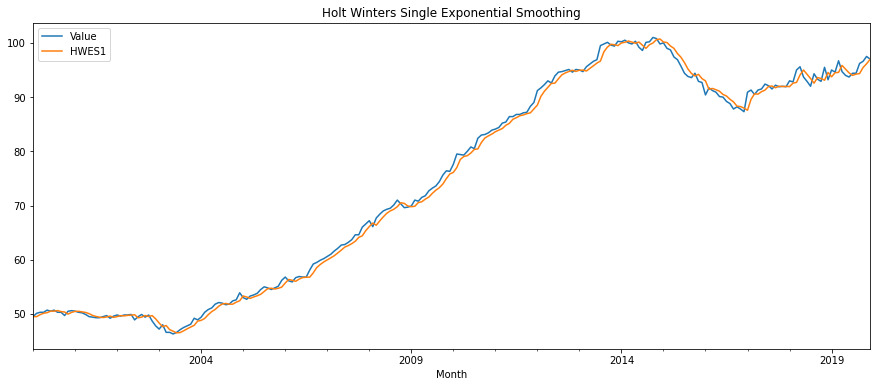

In [64]:
# holt winters (somente com o nível)
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Set the value of Alpha and define m (Time Period)
alpha = 0.6
df['HWES1'] = SimpleExpSmoothing(df['Value']).fit(smoothing_level=alpha,
                                                  optimized=False,
                                                  use_brute=True).fittedvalues
df[['Value','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


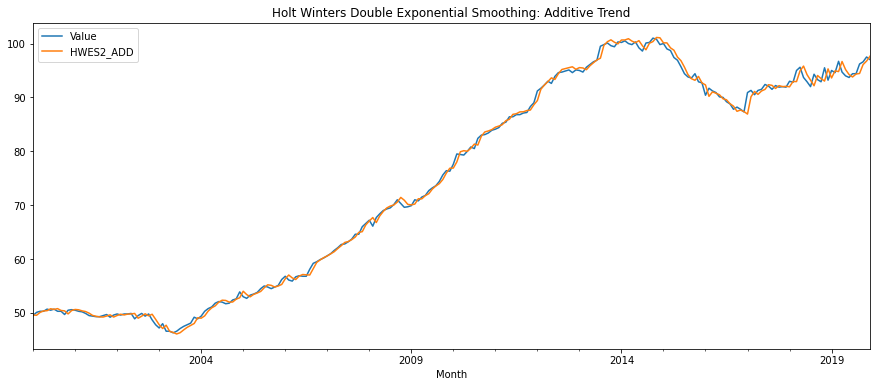

In [65]:
# holt winters (somente com a tendência aditiva e multiplicativa)
df['HWES2_ADD'] = ExponentialSmoothing(df['Value'],trend='add').fit().fittedvalues
#df['HWES2_MUL'] = ExponentialSmoothing(df['Value'],trend='mul').fit().fittedvalues
#df[['Value','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');
df[['Value','HWES2_ADD']].plot(title='Holt Winters Double Exponential Smoothing: Additive Trend');

Vamos fazer a previsão, utilizando o modelo de Holt-Winters para o IPCA. Começaremos dividindo o conjunto de dados em treino e teste. Pegamos 168 dados como conjunto de treino e os últimos 12 últimos pontos de dados como conjunto de teste:

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

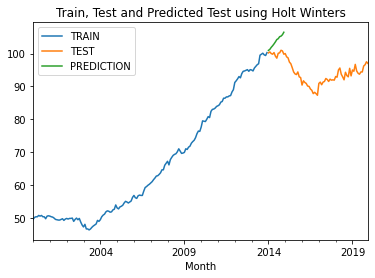

In [66]:
#Previsão 12 passos a frente com modelo de Holt-Winters
train_df = df [: 168]
test_df = df [168:]
fitted_model = ExponentialSmoothing(train_df['Value'],trend='mul',seasonal='mul',
                                    seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(12)
train_df['Value'].plot(legend=True,label='TRAIN')
test_df['Value'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

Podemos observar que as previsões feitas com o modelo de Holt-Winters para o IPCA não se ajustam tão bem, pois comparando o período de teste aos valores previstos vemos que a previsão está subestimada comprada ao período de teste.